# CHALLENGE 2
## Studi Kasus: Bank Customer Churn
(Menggunakan metode Klasifikasi ANN)


# Business Problem
Banyaknya pelanggan bank yang menghentikan layanan berdampak pada profit dari perusahaan. Menggunakan rekaman data yang dimiliki, perusahaan dapat melakukan analisis data. Sehingga perusahaan dapat memahami kemungkinan pelanggan akan menghentikan layanan dan dapat meningkatkan retensi bahkan mungkin merencanakan penambahan pelanggan.

Kami akan menganalisa dataset yang berisi beberapa pelanggan yang menarik akun mereka dari bank karena beberapa kerugian dan masalah lain, dengan bantuan data ini kami akan analisis dengan memprediksi perilaku pelangganya dan memprediksi apakah kostumer tersebut akan menghentikan layanan perusahaan (churn).

# Analytic Approach
Kami akan menggunakan pendekatan sistematis langkah demi langkah menggunakan metode yang dapat digunakan untuk berbagai masalah Machine Learning. Pada Kasus ini kami akan menggunakan algoritma ANN (Artificial Neural Network) untuk memprediksi costumer churn. Kami akan menggunakan TensorFlow deep learning frame work dalam pembuatan model

Customer churn merupakan pengukuran jumlah dari individu atau item yang keluar dari sekelompok kolektif dalam periode tertentu.

# Data Requirement
Melalui pendekatan prediktif, data yang dibutuhkan untuk menyelesaikan masalah bisnis diatas adalah data konsumen perusahaan tersebut, yang dimana sumber datanya langsung melalui database perusahaan tersebut dengan format berupa csv, dan data bertipe string/objek untuk data tertentu seperti nama kostumer, jenis kelamin, dan asal negara serta tipe data numerik untuk data-data yang dibutuhkan.
### Import Libraries
Ditahap ini kami akan menggunakan library Tensorflow dan Keras, dan library lainnya yang dibutuhkan untuk analisis dan visualisasi data. Seperti pada kode program dibawah ini:

In [1]:
import pandas as pd  #Data Analisis
import numpy as np   #komputasi Ilmiah

#Machine Learning Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Memanggil: 
#confusion_matrix untuk mengevaluasi kinerja suatu model
#classification report untuk mengukur kualitas prediksi dari algoritma klasifikasi
#(precision, recall, f1-score)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Visualisasi data
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Untuk search/manipulasi string
import re

import os

# Data Collection
Data didapatkan dari situs web Kaggle dengan judul "Bank Customer Churn" oleh Santosh Kumar, dalam bentuk csv. Usability pada data ini bernilai 9.7. Dataset ini berupa data detail dari beberapa kostumer di suatu perusahaan. Pertama-tama kita akan load datanya terlebih dahulu (Disini saya menggunakan Python Notebook pada IBM Cloud).

In [2]:
os.chdir('C:\\Users\\USER\\Project\\Churn Bank')

In [3]:
df_customer_churn = pd.read_csv('Churn_Modelling.csv')

In [4]:
#Cek berapa banyak baris data dan fiturnya
print(f'Banyaknya baris data= {df_customer_churn.shape[0]}\nBanyaknya fitur= {df_customer_churn.shape[1]}')
#f adalah format string!

Banyaknya baris data= 10000
Banyaknya fitur= 14


# Data Understanding
Mari mengenal lebih dekat dengan data yang akan diolah. Didapatkan Analisa sebagai berikut:
- Dataset terdiri dari 10000 kostumer dan 14 fitur
- Tiap baris merepresentasikan kostumer, adan tiap kolom adalah fitur dari kostumer
- Kolom "Exited" berisi 1 dan 0, dimana 1 berarti Ya, dan 0 berarti kostumer tidak keluar/berhenti menggunakan layanan
- Fitur yang ada pada dataset dapat dilihat dibawah ini,

| Fitur|Keterangan|
| :--- | :--- |
| RowNumber|Nomor Baris|
|CustomerId|Nomor identitas kostumer|
|Surname|Nama belakang|
|CreditScore|Nilai kredit yang menunjukkan kepada pemberi pinjaman kapasitas mereka untuk membayar kembali pinjaman|
|Geography|Negara atau wilayah|
|Gender|Laki-laki atau perempuan|
|Age|Umur dari kostumer|
|Tenure|Jumlah berapa bulan pelanggan sudah terikat di perusahaan|
|Balance|jumlah uang kostumer yang tersisa|
|NumOfProducts|Banyaknya produk yang mereka miliki|
|HasCrCard|Kostumer memiliki kartu kredit atau tidak|
|IsActiveMember|Seberapa aktif kostumer|
|EstimatedSalary|Estimasi gaji|
|Exited|Apakah kostumer tetap tinggal atau pergi|

### Basic Insight (1)
- Memahami dan mengecek tipe data pada dataset, untuk mengecek apakah tipe data tersebut cocok menggunakan metode yang kami harapkan (ANN), dan menghindari terjadinya tipe data yg missmatch

In [5]:
df_customer_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Tipe data diatas sudah sesuai. Terdapat 3 tipe data objek pada "Surname, Geography, dan Gender", dan sisanya adalah data berupa angka. 

### Basic insight (2) 
Melihat beberapa detail statistik dasar seperti persentil, max, min, mean, std, dll. dari data frame customer_churn ini

In [6]:
df_customer_churn.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Visualisations
Pada bagian ini, kami akan menunjukan visualisasi data yang merangkum/mengekstrak karakteristik fitur-fitur yang relevan dalam kumpulan data ini, seperti pada fitur "Tenure" fitur ini sangat krusial untuk mencari kostumer yang loyal dan tidak dan fitur "Exited" sebagai kesimpulan/dependen variabel dari tiap kostumer. Kami akan menggunakan ...... untuk plot "Tenure" dan menunjukan kostumer yang ada pada dataset apakah mereka exited atau stay.

*(Belum sempet utak atik kalo ada yg mau utak atik bikin visual gpp, bisa pake bar/histogram/heatmap atau yg lainnya...)*

In [7]:
df_customer_churn[df_customer_churn.CreditScore >= 850]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
38,39,15717426,Armstrong,850,France,Male,36,7,0.00,1,1,1,40812.90,0
180,181,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
200,201,15604482,Chiemezie,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,224,15733247,Stevenson,850,France,Male,33,10,0.00,1,1,0,4861.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,9582,15709256,Glover,850,France,Female,28,9,0.00,2,1,1,164864.67,0
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9688,9689,15730579,Ward,850,France,Male,68,5,169445.40,1,1,1,186335.07,0
9931,9932,15647800,Greco,850,France,Female,34,6,101266.51,1,1,0,33501.98,0


In [8]:
df_customer_churn.Exited.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Perbandingan Pelanggan Churn dan Tidak 

In [9]:
#Mengubah kolom Exited menjadi Yes or No
df_exited = df_customer_churn
df_exited['Exited'] = df_customer_churn.Exited.astype(bool)
df_exited.Exited.replace({True: 'Yes', False: 'No'}, inplace = True)

In [10]:
# Count of customer that  churn
cust_churn_yes_count = df_exited[df_exited.Exited == 'Yes'].shape[0]
# Count of customer that not churn (retain)
cust_churn_no_count = df_exited[df_exited.Exited == 'No'].shape[0]

# Percentage of customer that will churn
cust_churn_yes_percent = round((cust_churn_yes_count / (cust_churn_yes_count + cust_churn_no_count) * 100),2)
# Percentage of customer that will not churn (retain)
cust_churn_no_percent = round((cust_churn_no_count / (cust_churn_yes_count + cust_churn_no_count) * 100 ),2)

In [11]:
df_customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [12]:
df_customer_churn.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

## Plot EDA

### Pelanggan Churn dan tidak

C:\Users\USER\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

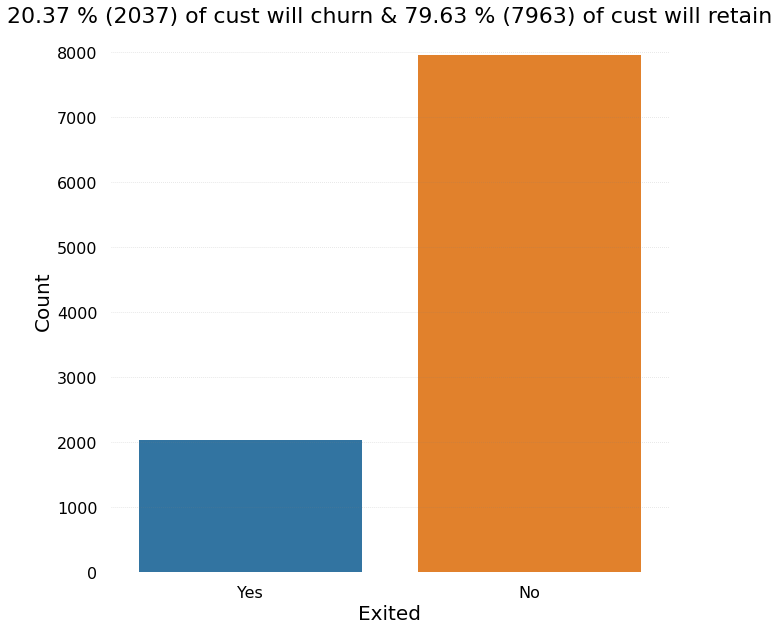

In [11]:
# Plot perbandingan antara pelanggan churn dan tidak
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(df_customer_churn['Exited'])
ax.set_title(f'{cust_churn_yes_percent} % ({cust_churn_yes_count}) of cust will churn & {cust_churn_no_percent} % ({cust_churn_no_count}) of cust will retain', fontsize = 22)
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('Exited', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)

C:\Users\USER\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

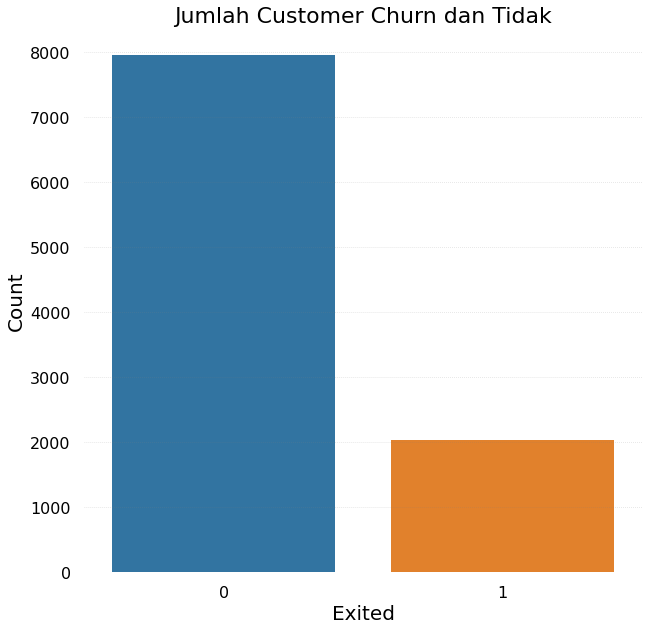

In [5]:
# Plot perbandingan antara pelanggan churn dan tidak
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(df_customer_churn['Exited'])
ax.set_title('Jumlah Customer Churn dan Tidak', fontsize = 22)
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('Exited', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)

In [6]:
fig.savefig('churnvsnochurn.jpg')

### Creditscore Terhadap Customer Churn

Text(0, 0.5, 'Count')

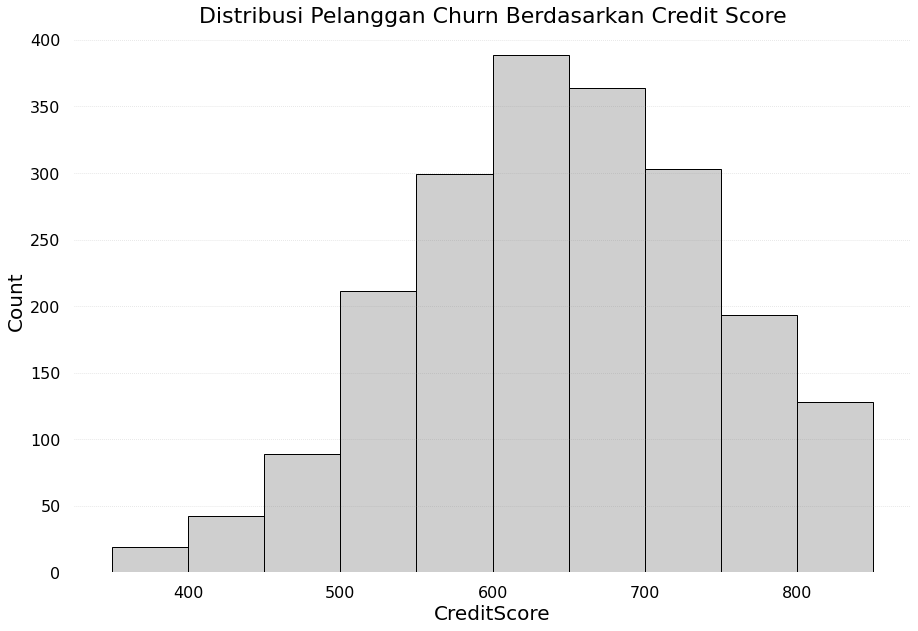

In [18]:
# Distribusi Nilai Credit Score yang melakukan pemberhentian langganan
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df_customer_churn.loc[df_customer_churn['Exited']=='Yes']['CreditScore'], bins = 10, color = 'silver')
ax.set_title('Distribusi Pelanggan Churn Berdasarkan Credit Score', fontsize = 22)
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('CreditScore', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)

In [19]:
fig.savefig('creditscoreinchurn.jpg')

### Pelanggan Churn berdasarkan Geography

In [24]:
geo = df_customer_churn.loc[df_customer_churn['Exited'] == 'Yes'].groupby('Geography').count().reset_index()[['Geography', 'RowNumber']].rename(columns={'RowNumber':'Total'})
geo

,Geography,Total
0,France,810
1,Germany,814
2,Spain,413


(-1.109947263903724,
 1.1902327201654939,
 -1.1802090455860457,
 1.124387841258733)

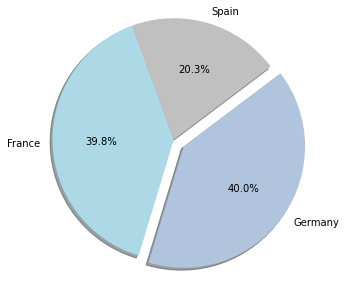

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
my_colors = ['lightblue','lightsteelblue','silver']
ax.pie(geo['Total'], labels = geo['Geography'],startangle=110, explode = (0, 0.1 , 0) ,shadow = True, colors= my_colors, autopct='%1.1f%%')
ax.axis('equal')

In [30]:
fig.savefig('geoinchurn.jpg')

### Pelanggan Churn berdasarkan Gender

In [14]:
x = df_customer_churn.loc[df_customer_churn['Exited'] == 'Yes'].groupby('Gender').count()['CustomerId'].reset_index()

C:\Users\USER\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 1200.0)

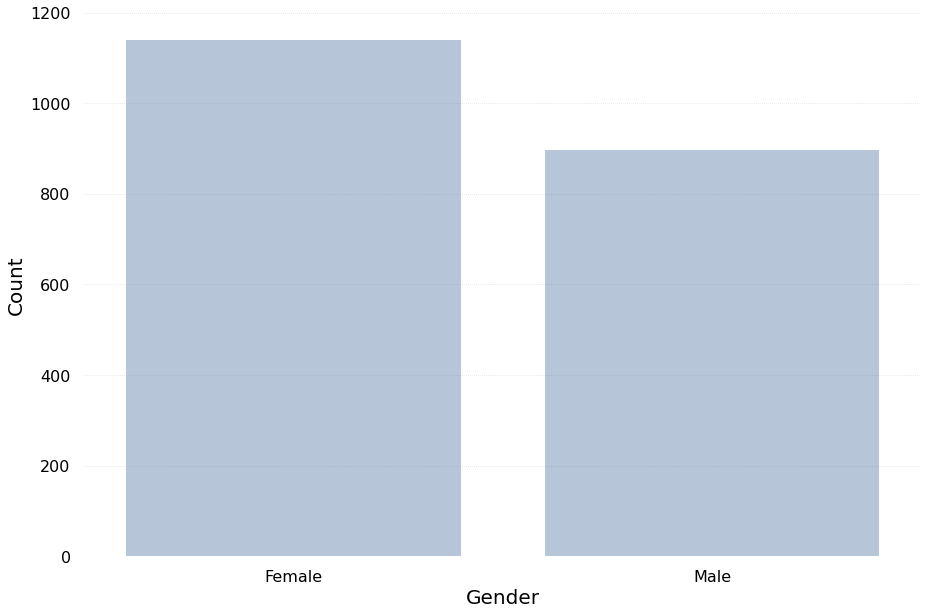

In [15]:
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x.Gender, x.CustomerId, color = 'lightsteelblue')
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('Gender', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_ylim(0, 1200)

In [16]:
fig.savefig('genderinchurn.jpg')

### Pelanggan churn terhadap Age

Text(0, 0.5, 'Count')

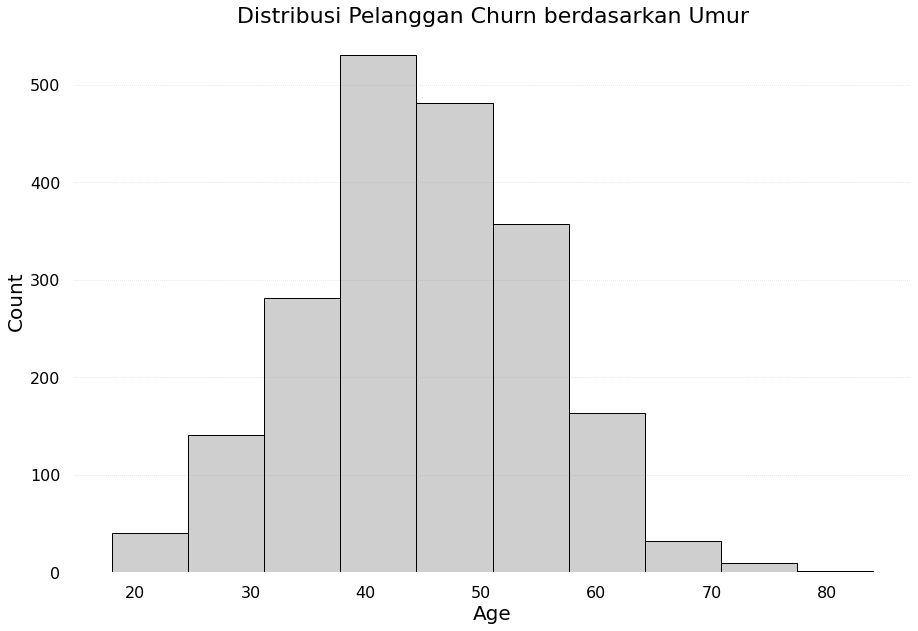

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df_customer_churn.loc[df_customer_churn['Exited']=='Yes']['Age'], bins = 10, color = 'silver')
ax.set_title('Distribusi Pelanggan Churn berdasarkan Umur', fontsize = 22)
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('Age', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)

In [15]:
fig.savefig('Ageinchurn.jpg')

### Pelanggan chrun terhadap tenure

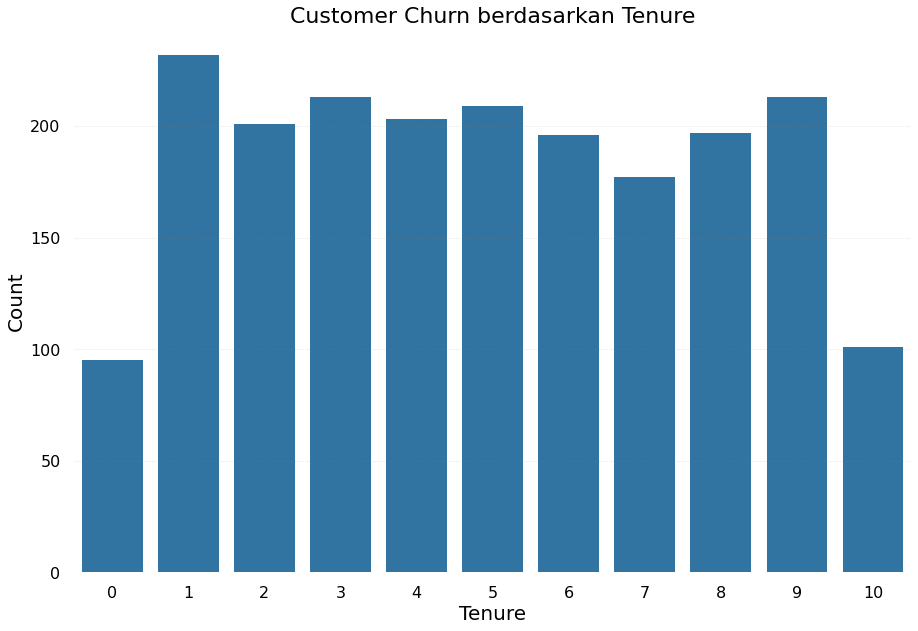

In [92]:
#Grafik Tanure Terhadap Customer Churn
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x= 'Tenure', hue='Exited', data=df_customer_churn[df_customer_churn.Exited == 'Yes'])
ax.set_title(f'Customer Churn berdasarkan Tenure', fontsize = 22)
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('Tenure', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.legend().remove()

In [93]:
fig.savefig('tenureinchurn.jpg')

Pada grafik diatas terlihat distribusi Data Creditscore dari Pelanggan. CreditScore memiliki rentang nilai dari 350 hingga 850. Frekuensi terbanyak data berada pada interval data dari 600-700. Dengan median dan rata-rata adalah 652 dan 650.52

### EstimatedSalary Terhadap Customer Churn

Text(0, 0.5, 'Count')

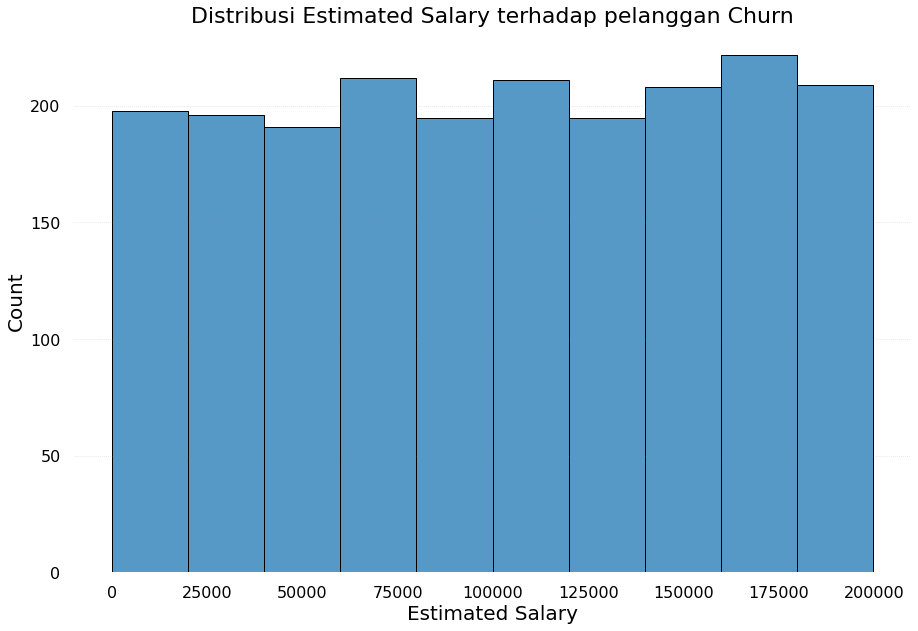

In [95]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df_customer_churn.loc[df_customer_churn['Exited']=='Yes']['EstimatedSalary'], bins = 10)
ax.set_title('Distribusi Estimated Salary terhadap pelanggan Churn', fontsize = 22)
ax.grid(axis = 'y', color = 'gray', linestyle = ':', linewidth = 0.75, alpha = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', labelsize=16, pad = 10, width = 0)
ax.set_xlabel('Estimated Salary', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)

In [96]:
fig.savefig('estimatedsalaryinchurn.jpg')

# Data Preparation
Ini adalah tahap sebelum data diproses. Pada tahap ini kami akan dilakukan serangkaian tindakan:
### Data Cleaning
Mempersiapkan data dengan mengeksplor datanya, memastikan tiap data sudah dalam format yang benar, tidak ada nilai null/kosong, duplikat, hingga menormalisasikan data.
#### a) Data Null 

In [22]:
df_customer_churn.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Terlihat tidak ada nilai yang kosong, karena tidak ada "True" pada output diatas. 
#### b) Unmatch Data
Selanjutnya kami cek data yang memiliki **nilai yg tidak sesuai, misalnya:**. 
- Pada Fitur Gender ada penulisan yang salah contohnya Harusnya Male, malah Mele.

In [23]:
# Melihat keberagaman gender pada Dataframe
df_customer_churn.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
# Melihat apakah ada salah penulisan Negara
print(df_customer_churn.Geography.unique())

['France' 'Spain' 'Germany']


### c) Duplicate Data
Selanjutnya mencari **data yang sama persis/duplikat** sebagai berikut:

In [25]:
df_customer_churn.duplicated().all()

False

Tidak ada data yang duplikat dikarenakan mengembalikan nilai False. 
#### d) Feature Engineering
Pada bagian ini, feature/fitur yang tidak berguna atau bersifat fatal akan dihapus, pada kasus inifitur yang dihapus berupa:
- Fitur Rownumber 
- CustomerId, dan
- Surname

Dikarenakan rowNumber tidak dibutuhkan pada pengolahan data, dan customerId adalah primary key yang tidak diperlukan, cukup berbahaya jika tersebar, dan Surname adalah data yang ridak diperlukan unuk menganalisis model maka cara menghilangkan fiturnya adalah sebagai berikut:

In [26]:
df_customer_churn = pd.read_csv('Churn_Modelling.csv')
#Jika memungkinkan terjadi peubahan data dengan signifikan
df1_customer_churn= df_customer_churn.drop(['Surname','RowNumber', 'CustomerId'],  axis=1)
list(df1_customer_churn.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# Alternatif Modelling

In [24]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [32]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [33]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Data preprocessing

In [25]:
dataset.drop(['RowNumber','CustomerId', 'Surname'], axis = 1, inplace = True)
dataset = pd.get_dummies(dataset)

In [23]:
list(dataset.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [37]:
#Kolom yang ingin dinormalisasi
kolom_normalisasi = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember','EstimatedSalary']

#Kodingan normalisasi pake MinMaxScaler
scaler = MinMaxScaler()

dataset[kolom_normalisasi] = scaler.fit_transform(dataset[kolom_normalisasi])
dataset[kolom_normalisasi].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441
std,0.193307,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977
50%,0.604000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960
75%,0.736000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [26]:
X = dataset.drop('Exited', axis = 1)
y = dataset.Exited

In [27]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=42)

In [40]:
X_test.shape

(2500, 13)

In [38]:
rf = RandomForestClassifier(n_estimators=150, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)
y_pred = rf.predict(X_test)

In [39]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1934   69]
 [ 267  230]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500

0.8656


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [41]:
pred = pd.DataFrame({'ytest':y_test, 'ypred':y_pred})
pred[(pred.ytest != pred.ypred ) & (pred.ypred == 0)]

,ytest,ypred
5202,1,0
5272,1,0
4640,1,0
9920,1,0
5589,1,0
...,...,...
868,1,0
8688,1,0
5640,1,0
2957,1,0


In [28]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
1,Age,0.236674
7,EstimatedSalary,0.147083
0,CreditScore,0.145690
3,Balance,0.139315
4,NumOfProducts,0.128989


In [29]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4901,673,0.554054,0.0,0.709683,0.333333,0.0,1.0,0.105271,1,0,0,0,1
4375,850,0.310811,0.8,0.242651,0.000000,1.0,0.0,0.159086,0,1,0,0,1
6698,725,0.175676,0.6,0.000000,0.000000,0.0,0.0,0.306604,1,0,0,1,0
9805,644,0.202703,0.7,0.695786,0.000000,0.0,1.0,0.219679,1,0,0,0,1
1101,703,0.148649,0.9,0.000000,0.333333,1.0,0.0,0.253364,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0.486486,0.8,0.277853,0.000000,1.0,1.0,0.346880,1,0,0,0,1
5191,682,0.540541,0.1,0.000000,0.000000,1.0,1.0,0.003475,1,0,0,1,0
5390,735,0.270270,0.1,0.000000,0.666667,0.0,0.0,0.461087,1,0,0,1,0
860,667,0.337838,0.8,0.758186,0.000000,1.0,0.0,0.487529,1,0,0,0,1


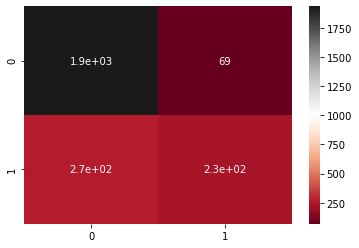

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'RdGy')

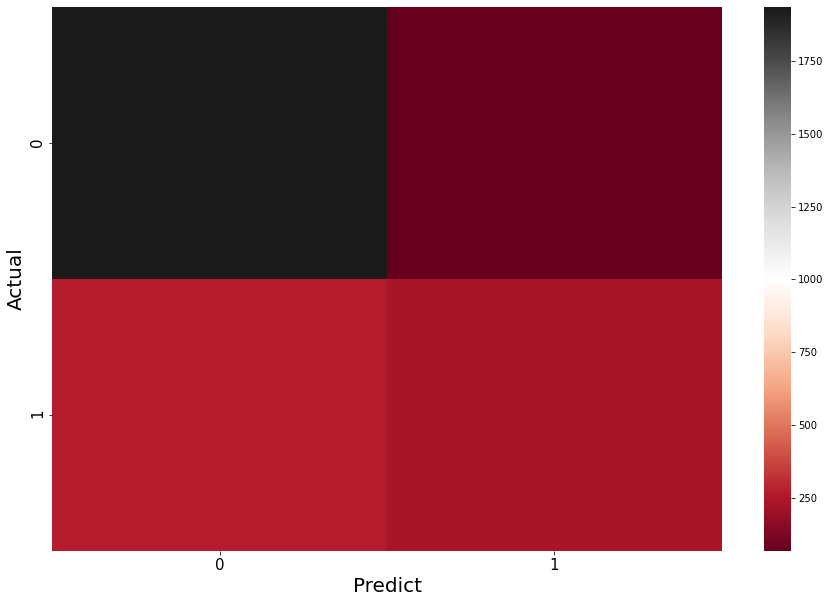

In [42]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(confusion_matrix(y_test,y_pred) , cmap = 'RdGy')
ax.set_xlabel('Predict', fontsize = 20)
ax.set_ylabel('Actual', fontsize = 20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [45]:
fig.savefig('confussionmatrix.jpg')